In [2]:
import gzip
import json

In [9]:
# Load raw data
with gzip.open('../data/data.json.gz', 'rt') as f:
    raw_str = f.read()
raw_json = json.loads(raw_str)

In [81]:
#%run ../code/download_data.py
%run ../code/formatters.py
%run ../code/plotters.py

In [85]:
def AL_formatter(state_raw, metric='cases'):
    state_raw = pd.DataFrame(state_raw)
    df = state_raw.loc[pd.isnull(state_raw['County Name']),:].sort_values('Scrape Time').reset_index(drop=True)
    df = df[['Scrape Time'] + df.columns[df.columns.str.contains('Age')].tolist()]
    df['date'] = pd.to_datetime(df['Scrape Time']).dt.date
    df = df.loc[~pd.isnull(df.date),:].drop(columns=['Scrape Time'])

    if metric=='cases':
        df = df[['date'] + df.columns[df.columns.str.contains('Cases')].tolist()]
    elif metric=='deaths':
        df = df[['date'] + df.columns[df.columns.str.contains('Deaths')].tolist()]

    df = df.set_index('date')
    df = df.drop_duplicates(keep='last')
    
    # The 'get_age_bucket' function tries its best to automatically extract and
    # and format the age range from a column name. It works fairly well on most
    # column formats I have come across so far. If it returns non-sensical results
    # you may need to write specific code to extract the age buckets for a partiuclar
    # state.
    buckets = pd.Series(pd.Series(df.columns).apply(get_age_bucket).unique())
    df.columns = buckets.tolist()
    
    df = df.astype(np.int32, errors='ignore')
    return(df)

In [76]:
state_raw = raw_json['USA']['AL']
df = AL_formatter(state_raw)
df

,0-4,18-24,25-49,5-17,50-64,65-100,5-24,unknown
date,,,,,,,,
2020-06-29,617.0,NaN,15123.0,NaN,7624.0,6510.0,6536.0,272.0
2020-06-30,639.0,NaN,15606.0,NaN,7817.0,6638.0,6805.0,31.0
2020-07-01,653.0,NaN,15984.0,NaN,7986.0,6787.0,7003.0,29.0
2020-07-02,677.0,NaN,16457.0,NaN,8208.0,6957.0,7277.0,28.0
2020-07-03,712.0,NaN,17178.0,NaN,8497.0,7196.0,7714.0,65.0
2020-07-04,732.0,NaN,17597.0,NaN,8660.0,7321.0,7920.0,129.0
2020-07-05,764.0,NaN,18024.0,NaN,8833.0,7444.0,8156.0,229.0
2020-07-06,774.0,NaN,18376.0,NaN,9000.0,7538.0,8368.0,319.0
2020-07-07,793.0,NaN,18828.0,NaN,9176.0,7698.0,8607.0,161.0


In [77]:
formatted_df, ranges = get_per_capita_data(state_df=AL_df, ST='AL')

In [78]:
formatted_df.head()

,0-4,5-24,5-17,18-24,25-49,50-100
date,,,,,,
2020-06-29,2.096094,5.269421,NaN,NaN,9.820245,7.788856
2020-06-30,2.170833,5.486293,NaN,NaN,10.133885,7.965750
2020-07-01,2.218395,5.645923,NaN,NaN,10.379342,8.140991
2020-07-02,2.299928,5.866826,NaN,NaN,10.686489,8.357011
2020-07-03,2.418832,6.219142,NaN,NaN,11.154676,8.647977


In [83]:
ranges

[['0-4', '5-24', '25-49', '50-100'],
 ['0-4', '5-17', '18-24', '25-49', '50-100']]

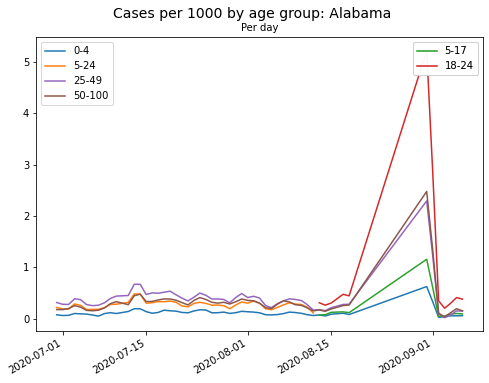

In [82]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,6

plot_data('AL', metric='cases', roll=1, formatted_df=formatted_df, grp_ranges=ranges)